In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [3]:
data=pd.read_csv('Data_assignment.csv')

In [4]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
data.shape

(8523, 12)

In [8]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data['Item_Weight'].mean()

12.857645184136183

In [11]:
data['Item_Weight'].median()

12.6

<AxesSubplot:>

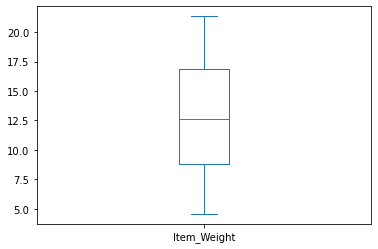

In [12]:
data['Item_Weight'].plot(kind='box')

In [13]:
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].median())

In [14]:
data['Item_Weight'].isna().sum()

0

In [15]:
data.dropna(subset=['Outlet_Size'],inplace=True)

In [16]:
data.shape

(6113, 12)

In [17]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
#Detecting outlier with z-score
outliers=[]
def detect_outlier(insurance):
    
    threshold=3
    mean_1 = np.mean(insurance)
    std_1 = np.std(insurance)
    
    
    for y in insurance:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers


In [19]:
data['Item_Visibility'] = data['Item_Visibility'].astype('float')

In [20]:
data.select_dtypes(include=np.number).apply(detect_outlier)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0.255395,0.255395,0.255395,0.255395,0.255395
1,0.293418,0.293418,0.293418,0.293418,0.293418
2,0.278974,0.278974,0.278974,0.278974,0.278974
3,0.264125,0.264125,0.264125,0.264125,0.264125
4,0.220226,0.220226,0.220226,0.220226,0.220226
...,...,...,...,...,...
110,9678.068800,9678.068800,9678.068800,9678.068800,9678.068800
111,8417.709400,8417.709400,8417.709400,8417.709400,8417.709400
112,9227.988000,9227.988000,9227.988000,9227.988000,9227.988000
113,9390.443200,9390.443200,9390.443200,9390.443200,9390.443200


In [21]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])
    

Item_Weight
Outliers =  Series([], Name: Item_Weight, dtype: float64)
Item_Visibility
Outliers =  49      0.255395
83      0.293418
108     0.278974
284     0.193773
334     0.204700
          ...   
8194    0.299098
8215    0.279887
8273    0.297313
8292    0.209163
8345    0.266397
Name: Item_Visibility, Length: 81, dtype: float64
Item_MRP
Outliers =  Series([], Name: Item_MRP, dtype: float64)
Outlet_Establishment_Year
Outliers =  Series([], Name: Outlet_Establishment_Year, dtype: int64)


In [22]:
#Removed the age outlier
data = data[~(data['Item_Visibility']>0.18)]

<AxesSubplot:>

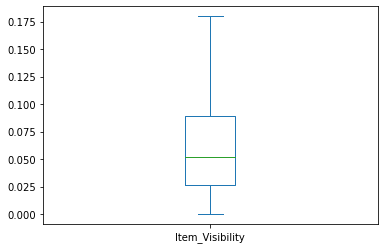

In [23]:
data['Item_Visibility'].plot(kind='box')

In [24]:
data.shape

(5983, 12)

In [25]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
data['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
4       Low Fat
5       Regular
         ...   
8517        reg
8518    Low Fat
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 5983, dtype: object

In [27]:
data['Item_Fat_Content'].isna().sum()

0

In [28]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [29]:
data['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat'},inplace=True)
data['Item_Fat_Content'].replace({'reg':'Regular'},inplace=True)

C:\Users\devad\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [31]:
data['Item_Fat_Content'].value_counts()

Low Fat    3875
Regular    2108
Name: Item_Fat_Content, dtype: int64

In [32]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Household', 'Baking Goods',
       'Snack Foods', 'Fruits and Vegetables', 'Breakfast',
       'Health and Hygiene', 'Hard Drinks', 'Frozen Foods', 'Canned',
       'Starchy Foods', 'Breads', 'Others', 'Seafood'], dtype=object)

In [33]:
data['Outlet_Identifier'].replace({'OUT027':27,'OUT013':13,'OUT035':35,'OUT046':46,'OUT049':49,'OUT018':18,'OUT019':19},inplace=True)

In [34]:
data['Outlet_Identifier'].unique()

array([49, 18, 13, 27, 46, 35, 19], dtype=int64)

In [35]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,18,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,46,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,13,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,35,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,18,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [36]:
data_num = data.select_dtypes(include = np.number)

In [37]:
data_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,49,1999,3735.1380
1,5.920,0.019278,48.2692,18,2009,443.4228
2,17.500,0.016760,141.6180,49,1999,2097.2700
4,8.930,0.000000,53.8614,13,1987,994.7052
5,10.395,0.000000,51.4008,18,2009,556.6088
...,...,...,...,...,...,...
8517,20.750,0.083607,178.8318,46,1997,3608.6360
8518,6.865,0.056783,214.5218,13,1987,2778.3834
8520,10.600,0.035186,85.1224,35,2004,1193.1136
8521,7.210,0.145221,103.1332,18,2009,1845.5976


In [38]:
scaling = MinMaxScaler()

In [39]:
# sklearn onehot
pd.DataFrame(scaling.fit_transform(data_num), columns = data_num.columns )

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales
0,0.282525,0.089247,0.927507,1.000000,0.583333,0.283550
1,0.081274,0.107216,0.072068,0.138889,1.000000,0.031370
2,0.770765,0.093211,0.468288,1.000000,0.583333,0.158072
3,0.260494,0.000000,0.095805,0.000000,0.083333,0.073604
4,0.347723,0.000000,0.085361,0.138889,1.000000,0.040041
...,...,...,...,...,...,...
5978,0.964275,0.464980,0.626243,0.916667,0.500000,0.273859
5979,0.137541,0.315802,0.777729,0.000000,0.083333,0.210252
5980,0.359929,0.195689,0.228492,0.611111,0.791667,0.088804
5981,0.158083,0.807648,0.304939,0.138889,1.000000,0.138791


In [40]:
scaling = StandardScaler()
data_scale = pd.DataFrame(scaling.fit_transform(data_num), columns = data_num.columns )

In [41]:
data_scale

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales
0,-0.860127,-1.015486,1.747047,1.400493,0.345667,0.794653
1,-1.682989,-0.942588,-1.496023,-0.936451,1.480813,-1.099604
2,1.136166,-0.999404,0.006094,1.400493,0.345667,-0.147878
3,-0.950204,-1.377556,-1.406037,-1.313377,-1.016509,-0.782362
4,-0.593549,-1.377556,-1.445631,-0.936451,1.480813,-1.034470
...,...,...,...,...,...,...
5978,1.927379,0.508834,0.604918,1.174337,0.118637,0.721856
5979,-1.452929,-0.096370,1.179222,-1.313377,-1.016509,0.244077
5980,-0.543642,-0.583659,-0.903002,0.345099,0.913240,-0.668185
5981,-1.368938,1.899014,-0.613182,-0.936451,1.480813,-0.292706


In [42]:
data_cat = data.select_dtypes(exclude = np.number)

In [43]:
data_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
4,NCD19,Low Fat,Household,High,Tier 3,Supermarket Type1
5,FDP36,Regular,Baking Goods,Medium,Tier 3,Supermarket Type2
...,...,...,...,...,...,...
8517,FDF53,Regular,Frozen Foods,Small,Tier 1,Supermarket Type1
8518,FDF22,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2


In [46]:
data_fatcontent_cat = pd.get_dummies(data_cat['Item_Fat_Content'])

In [47]:
data_size_cat = pd.get_dummies(data_cat['Outlet_Size'])

In [48]:
data_loc_cat = pd.get_dummies(data_cat['Outlet_Location_Type'])

In [49]:
data_type_cat = pd.get_dummies(data_cat['Outlet_Type'])

In [50]:
data['Outlet_Identifier'].replace({'OUT027':'27','OUT013':'13','OUT035':'35','OUT046':'46','OUT049':'49','OUT018':'18','OUT019':'19'},inplace=True)

C:\Users\devad\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [51]:
data_scale = data_scale.reset_index().drop(columns = 'index')
data_fatcontent_cat = data_fatcontent_cat.reset_index().drop(columns = 'index')
data_size_cat = data_size_cat.reset_index().drop(columns = 'index')
data_loc_cat = data_loc_cat.reset_index().drop(columns = 'index')
data_type_cat = data_type_cat.reset_index().drop(columns = 'index')
data_out_cat = data['Outlet_Identifier'].reset_index().drop(columns = 'index')

In [52]:
pd.concat([data_scale,data_fatcontent_cat,data_size_cat,data_out_cat,data_loc_cat,data_type_cat], axis = 1)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Low Fat,Regular,High,Medium,Small,Outlet_Identifier,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,-0.860127,-1.015486,1.747047,1.400493,0.345667,0.794653,1,0,0,1,0,49,1,0,0,0,1,0,0
1,-1.682989,-0.942588,-1.496023,-0.936451,1.480813,-1.099604,0,1,0,1,0,18,0,0,1,0,0,1,0
2,1.136166,-0.999404,0.006094,1.400493,0.345667,-0.147878,1,0,0,1,0,49,1,0,0,0,1,0,0
3,-0.950204,-1.377556,-1.406037,-1.313377,-1.016509,-0.782362,1,0,1,0,0,13,0,0,1,0,1,0,0
4,-0.593549,-1.377556,-1.445631,-0.936451,1.480813,-1.034470,0,1,0,1,0,18,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978,1.927379,0.508834,0.604918,1.174337,0.118637,0.721856,0,1,0,0,1,46,1,0,0,0,1,0,0
5979,-1.452929,-0.096370,1.179222,-1.313377,-1.016509,0.244077,1,0,1,0,0,13,0,0,1,0,1,0,0
5980,-0.543642,-0.583659,-0.903002,0.345099,0.913240,-0.668185,1,0,0,0,1,35,0,1,0,0,1,0,0
5981,-1.368938,1.899014,-0.613182,-0.936451,1.480813,-0.292706,0,1,0,1,0,18,0,0,1,0,0,1,0
